# Credit Card Customer Attrition & Segmentation Analysis

## Project Overview
This notebook analyzes credit card customer data to predict customer attrition (churn) and identify distinct customer segments for targeted business strategies.

## Dataset Description
- **Domain**: Consumer credit card portfolio management
- **Size**: 10,127 customers with 23 features
- **Data Types**: Demographics, account information, transaction behavior, relationship metrics
- **Target Variable**: Attrition_Flag (identifies churned vs existing customers)

## Business Objectives

### Primary Goals
1. **Churn Prediction**: Build a model to identify customers likely to cancel their credit cards
2. **Customer Segmentation**: Group customers into meaningful segments for targeted marketing and retention

### Key Business Questions
- What factors most strongly predict customer attrition?
- Which customer segments require immediate attention?
- How can we proactively retain high-value customers?
- What are the characteristics of our most loyal customer base?

## Analytical Approach

### Phase 1: Exploratory Data Analysis
- Data quality assessment and basic statistics
- Attrition rate analysis and customer behavior patterns
- Comparative analysis between churned vs existing customers

### Phase 2: Predictive Modeling (Churn Prediction)
- Feature selection based on exploratory insights
- Random Forest classifier implementation
- Model performance evaluation and feature importance analysis
- Identification of key attrition drivers

### Phase 3: Customer Segmentation (Clustering Analysis)
- K-Means clustering on behavioral and demographic features
- Optimal cluster number determination
- Segment profiling and business interpretation
- Risk-value matrix development for strategic planning

## Expected Outcomes
- Predictive model for early churn detection
- Actionable customer segments with retention strategies
- Data-driven recommendations for portfolio management
- Framework for ongoing customer relationship optimization

## Technical Stack
- **Data Processing**: pandas, numpy
- **Machine Learning**: scikit-learn (Random Forest, K-Means)
- **Visualization**: matplotlib, seaborn
- **Evaluation**: Classification metrics, clustering validation

---


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('Customer Attrition - (Clustering-Segmentation).csv')

# Basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

# First few rows
print("\nFirst 5 rows:")
print(df.head())

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values check
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics for numerical columns
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (10127, 23)

Column Names:
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

First 5 rows:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer           

In [7]:
# Step 2: Analyze attrition patterns

# Check attrition distribution
print("Attrition Distribution:")
print(df['Attrition_Flag'].value_counts())
print("\nAttrition Percentage:")
print(df['Attrition_Flag'].value_counts(normalize=True) * 100)

# Basic comparison between churned and existing customers
print("\n" + "="*50)
print("CHURNED vs EXISTING CUSTOMERS COMPARISON")
print("="*50)

# Age comparison
print("\nAge Comparison:")
age_comparison = df.groupby('Attrition_Flag')['Customer_Age'].agg(['mean', 'median', 'std'])
print(age_comparison)

# Credit limit comparison
print("\nCredit Limit Comparison:")
credit_comparison = df.groupby('Attrition_Flag')['Credit_Limit'].agg(['mean', 'median', 'std'])
print(credit_comparison)

# Transaction amount comparison
print("\nTransaction Amount Comparison:")
trans_comparison = df.groupby('Attrition_Flag')['Total_Trans_Amt'].agg(['mean', 'median', 'std'])
print(trans_comparison)

# Months on book comparison
print("\nMonths on Book Comparison:")
months_comparison = df.groupby('Attrition_Flag')['Months_on_book'].agg(['mean', 'median', 'std'])
print(months_comparison)

Attrition Distribution:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Attrition Percentage:
Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64

CHURNED vs EXISTING CUSTOMERS COMPARISON

Age Comparison:
                        mean  median       std
Attrition_Flag                                
Attrited Customer  46.659496    47.0  7.665652
Existing Customer  46.262118    46.0  8.081157

Credit Limit Comparison:
                          mean  median          std
Attrition_Flag                                     
Attrited Customer  8136.039459  4178.0  9095.334105
Existing Customer  8726.877518  4643.5  9084.969807

Transaction Amount Comparison:
                          mean  median          std
Attrition_Flag                                     
Attrited Customer  3095.025814  2329.0  2308.227629
Existing Customer  4654.655882  4100.0  3512.772635

Months on Book Comparison:
 

In [8]:
# Step 3: Find patterns in customer behavior

print("CUSTOMER BEHAVIOR PATTERNS")
print("="*50)

# Activity patterns
print("\n1. ACTIVITY PATTERNS:")
activity_patterns = df.groupby('Attrition_Flag').agg({
    'Months_Inactive_12_mon': 'mean',
    'Contacts_Count_12_mon': 'mean',
    'Total_Trans_Ct': 'mean'
}).round(2)
print(activity_patterns)

# Card usage patterns
print("\n2. CARD USAGE PATTERNS:")
usage_patterns = df.groupby('Attrition_Flag').agg({
    'Total_Revolving_Bal': 'mean',
    'Avg_Utilization_Ratio': 'mean',
    'Avg_Open_To_Buy': 'mean'
}).round(2)
print(usage_patterns)

# Relationship patterns
print("\n3. RELATIONSHIP PATTERNS:")
relationship_patterns = df.groupby('Attrition_Flag').agg({
    'Total_Relationship_Count': 'mean',
    'Dependent_count': 'mean'
}).round(2)
print(relationship_patterns)

# Categorical breakdowns
print("\n4. GENDER BREAKDOWN:")
gender_churn = pd.crosstab(df['Gender'], df['Attrition_Flag'], normalize='index') * 100
print(gender_churn.round(1))

print("\n5. CARD CATEGORY BREAKDOWN:")
card_churn = pd.crosstab(df['Card_Category'], df['Attrition_Flag'], normalize='index') * 100
print(card_churn.round(1))

print("\n6. INCOME CATEGORY BREAKDOWN:")
income_churn = pd.crosstab(df['Income_Category'], df['Attrition_Flag'], normalize='index') * 100
print(income_churn.round(1))

CUSTOMER BEHAVIOR PATTERNS

1. ACTIVITY PATTERNS:
                   Months_Inactive_12_mon  Contacts_Count_12_mon  \
Attrition_Flag                                                     
Attrited Customer                    2.69                   2.97   
Existing Customer                    2.27                   2.36   

                   Total_Trans_Ct  
Attrition_Flag                     
Attrited Customer           44.93  
Existing Customer           68.67  

2. CARD USAGE PATTERNS:
                   Total_Revolving_Bal  Avg_Utilization_Ratio  Avg_Open_To_Buy
Attrition_Flag                                                                
Attrited Customer               672.82                   0.16          7463.22
Existing Customer              1256.60                   0.30          7470.27

3. RELATIONSHIP PATTERNS:
                   Total_Relationship_Count  Dependent_count
Attrition_Flag                                              
Attrited Customer                      3.28

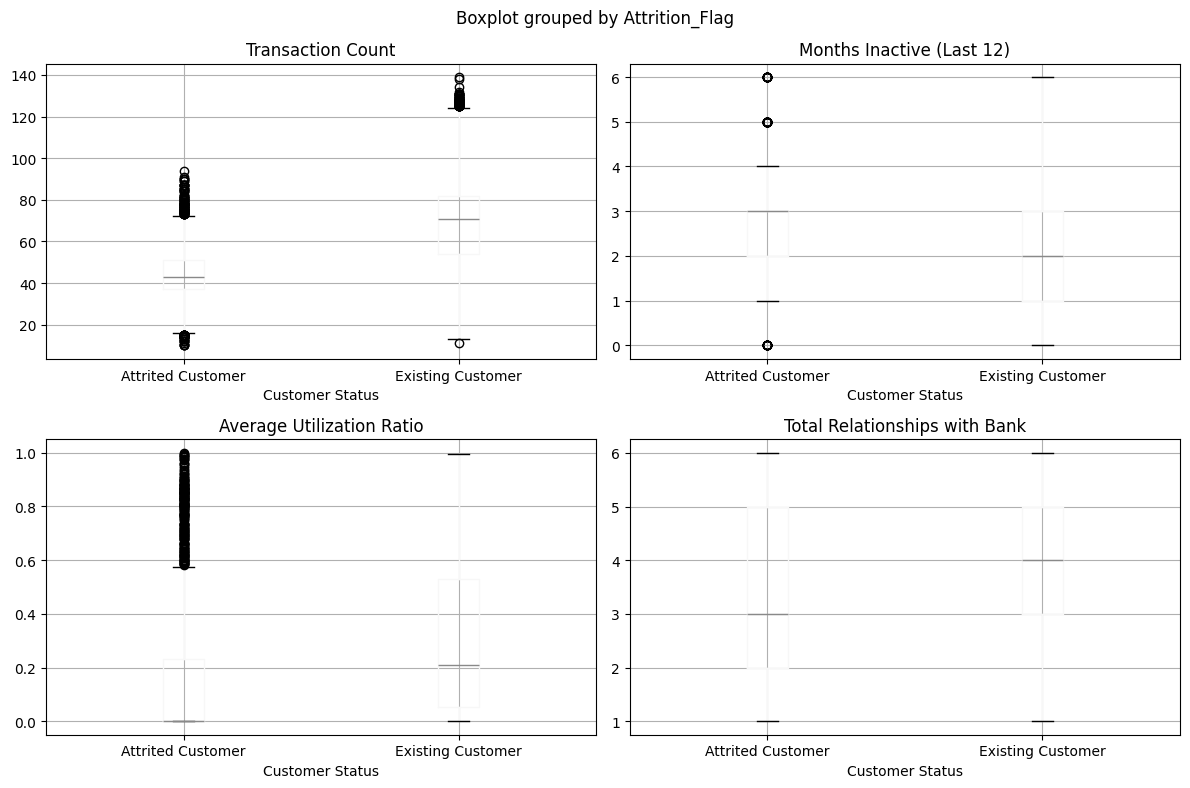


KEY INSIGHTS:
Average Transactions:
  Existing: 69
  Churned:  45

Average Inactive Months:
  Existing: 2.3
  Churned:  2.7

Average Relationships:
  Existing: 3.9
  Churned:  3.3


In [9]:
# Step 4: Simple visualization of key patterns

# Create a simple comparison chart
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Key Differences: Churned vs Existing Customers', fontsize=16)

# 1. Transaction Count
df.boxplot(column='Total_Trans_Ct', by='Attrition_Flag', ax=axes[0,0])
axes[0,0].set_title('Transaction Count')
axes[0,0].set_xlabel('Customer Status')

# 2. Months Inactive
df.boxplot(column='Months_Inactive_12_mon', by='Attrition_Flag', ax=axes[0,1])
axes[0,1].set_title('Months Inactive (Last 12)')
axes[0,1].set_xlabel('Customer Status')

# 3. Utilization Ratio
df.boxplot(column='Avg_Utilization_Ratio', by='Attrition_Flag', ax=axes[1,0])
axes[1,0].set_title('Average Utilization Ratio')
axes[1,0].set_xlabel('Customer Status')

# 4. Total Relationship Count
df.boxplot(column='Total_Relationship_Count', by='Attrition_Flag', ax=axes[1,1])
axes[1,1].set_title('Total Relationships with Bank')
axes[1,1].set_xlabel('Customer Status')

plt.tight_layout()
plt.show()

# Quick summary of findings
print("\nKEY INSIGHTS:")
print("="*40)

# Calculate key differences
existing = df[df['Attrition_Flag'] == 'Existing Customer']
churned = df[df['Attrition_Flag'] == 'Attrited Customer']

print(f"Average Transactions:")
print(f"  Existing: {existing['Total_Trans_Ct'].mean():.0f}")
print(f"  Churned:  {churned['Total_Trans_Ct'].mean():.0f}")

print(f"\nAverage Inactive Months:")
print(f"  Existing: {existing['Months_Inactive_12_mon'].mean():.1f}")
print(f"  Churned:  {churned['Months_Inactive_12_mon'].mean():.1f}")

print(f"\nAverage Relationships:")
print(f"  Existing: {existing['Total_Relationship_Count'].mean():.1f}")
print(f"  Churned:  {churned['Total_Relationship_Count'].mean():.1f}")

In [10]:
# Step 5: Simple Churn Prediction Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

print("BUILDING CHURN PREDICTION MODEL")
print("="*40)

# Prepare the data
# Select important features (based on our analysis)
features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Create feature matrix
X = df[features].copy()
print(f"Selected {len(features)} features for prediction")

# Handle target variable
le = LabelEncoder()
y = le.fit_transform(df['Attrition_Flag'])
print(f"Target classes: {le.classes_}")
print(f"0 = {le.classes_[0]}, 1 = {le.classes_[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {X_train.shape[0]} customers")
print(f"Test set: {X_test.shape[0]} customers")

# Train a simple Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.3f}")

print("\nDetailed Results:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Feature importance
print("\nMost Important Features:")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in feature_importance.head(5).iterrows():
    print(f"{row['feature']}: {row['importance']:.3f}")

BUILDING CHURN PREDICTION MODEL
Selected 11 features for prediction
Target classes: ['Attrited Customer' 'Existing Customer']
0 = Attrited Customer, 1 = Existing Customer

Training set: 8101 customers
Test set: 2026 customers

Model Accuracy: 0.955

Detailed Results:
                   precision    recall  f1-score   support

Attrited Customer       0.91      0.80      0.85       327
Existing Customer       0.96      0.98      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.94      0.89      0.91      2026
     weighted avg       0.95      0.95      0.95      2026


Most Important Features:
Total_Trans_Amt: 0.244
Total_Trans_Ct: 0.215
Total_Revolving_Bal: 0.140
Total_Relationship_Count: 0.086
Avg_Utilization_Ratio: 0.076


Model Performance:

95.5% accuracy - Very good! The model correctly predicts churn 95.5% of the time
High precision and recall - It's good at both finding churners and not falsely flagging loyal customers

Most Important Predictors of Churn:

Total_Trans_Amt (0.244) - Transaction amount is the biggest predictor
Total_Trans_Ct (0.215) - Number of transactions also very important
Total_Revolving_Bal (0.140) - How much they carry as balance
Total_Relationship_Count (0.086) - Number of products with the bank
Avg_Utilization_Ratio (0.076) - How much of their credit they use

Key Insight: Transaction behavior (amount and frequency) is the strongest signal for predicting churn!

In [11]:
# Step 6: Customer Segmentation with Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("CUSTOMER SEGMENTATION")
print("="*30)

# Select features for segmentation (behavioral + demographic)
segment_features = [
    'Customer_Age', 'Credit_Limit', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Avg_Utilization_Ratio',
    'Total_Relationship_Count', 'Months_Inactive_12_mon'
]

# Prepare data for clustering
X_segment = df[segment_features].copy()

# Scale the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_segment)

# Find optimal number of clusters (simple method)
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

print("Inertia scores for different K values:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.0f}")

# Use 4 clusters (reasonable for business use)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_clustered = df.copy()
df_clustered['Segment'] = clusters

print(f"\nCreated {n_clusters} customer segments")
print("Segment sizes:")
print(df_clustered['Segment'].value_counts().sort_index())

CUSTOMER SEGMENTATION
Inertia scores for different K values:
K=2: 57322
K=3: 48030
K=4: 44026
K=5: 39779
K=6: 37468
K=7: 34887

Created 4 customer segments
Segment sizes:
Segment
0    2964
1    1261
2    3112
3    2790
Name: count, dtype: int64


In [12]:
# Step 7: Analyze and Name Customer Segments

print("CUSTOMER SEGMENT ANALYSIS")
print("="*40)

# Analyze each segment's characteristics
segment_profile = df_clustered.groupby('Segment').agg({
    'Customer_Age': 'mean',
    'Credit_Limit': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean',
    'Avg_Utilization_Ratio': 'mean',
    'Total_Relationship_Count': 'mean',
    'Months_Inactive_12_mon': 'mean'
}).round(2)

print("Segment Profiles:")
print(segment_profile)

# Check churn rate by segment
print("\nChurn Rate by Segment:")
churn_by_segment = df_clustered.groupby('Segment')['Attrition_Flag'].apply(
    lambda x: (x == 'Attrited Customer').mean() * 100
).round(1)
print(churn_by_segment)

# Detailed analysis for naming segments
print("\n" + "="*50)
print("SEGMENT CHARACTERISTICS")
print("="*50)

for segment in range(n_clusters):
    seg_data = df_clustered[df_clustered['Segment'] == segment]
    churn_rate = (seg_data['Attrition_Flag'] == 'Attrited Customer').mean() * 100

    print(f"\nSEGMENT {segment}:")
    print(f"Size: {len(seg_data)} customers ({len(seg_data)/len(df_clustered)*100:.1f}%)")
    print(f"Churn Rate: {churn_rate:.1f}%")
    print(f"Avg Age: {seg_data['Customer_Age'].mean():.0f}")
    print(f"Avg Credit Limit: ${seg_data['Credit_Limit'].mean():,.0f}")
    print(f"Avg Transaction Amount: ${seg_data['Total_Trans_Amt'].mean():,.0f}")
    print(f"Avg Transaction Count: {seg_data['Total_Trans_Ct'].mean():.0f}")
    print(f"Avg Utilization: {seg_data['Avg_Utilization_Ratio'].mean():.2f}")
    print(f"Avg Relationships: {seg_data['Total_Relationship_Count'].mean():.1f}")
    print(f"Avg Inactive Months: {seg_data['Months_Inactive_12_mon'].mean():.1f}")

# Simple business names based on patterns
print("\n" + "="*50)
print("SUGGESTED SEGMENT NAMES")
print("="*50)

# Create segment names based on characteristics
segment_names = {}
for segment in range(n_clusters):
    seg_data = df_clustered[df_clustered['Segment'] == segment]

    avg_trans = seg_data['Total_Trans_Amt'].mean()
    avg_count = seg_data['Total_Trans_Ct'].mean()
    churn_rate = (seg_data['Attrition_Flag'] == 'Attrited Customer').mean() * 100
    utilization = seg_data['Avg_Utilization_Ratio'].mean()

    # Simple naming logic
    if avg_trans > df['Total_Trans_Amt'].mean() and churn_rate < 20:
        name = "High Value Customers"
    elif churn_rate > 30:
        name = "At Risk Customers"
    elif avg_count < df['Total_Trans_Ct'].mean() * 0.5:
        name = "Low Activity Customers"
    else:
        name = "Regular Customers"

    segment_names[segment] = name
    print(f"Segment {segment}: {name}")

CUSTOMER SEGMENT ANALYSIS
Segment Profiles:
         Customer_Age  Credit_Limit  Total_Trans_Amt  Total_Trans_Ct  \
Segment                                                                
0               40.78       6499.94          3461.66           62.71   
1               45.57      15164.66         11977.52          101.22   
2               47.60       2723.79          3664.63           64.40   
3               51.14      14534.37          2807.11           51.23   

         Avg_Utilization_Ratio  Total_Relationship_Count  \
Segment                                                    
0                         0.14                      4.27   
1                         0.16                      2.10   
2                         0.63                      3.98   
3                         0.08                      3.91   

         Months_Inactive_12_mon  
Segment                          
0                          2.06  
1                          2.21  
2                         

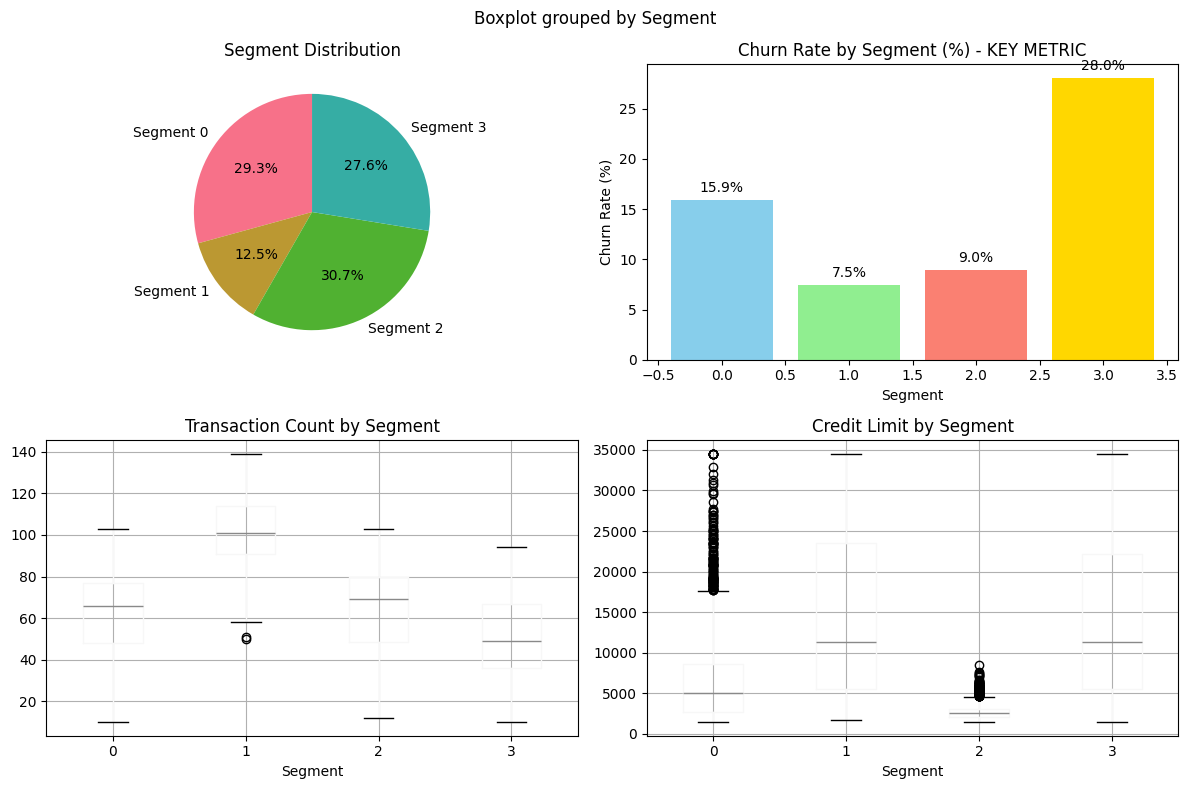


KEY SEGMENT METRICS
         Size  Churn_Rate_%  Customer_Age  Credit_Limit  Total_Trans_Ct  \
Segment                                                                   
0        2964          15.9          41.0        6500.0            63.0   
1        1261           7.5          46.0       15165.0           101.0   
2        3112           9.0          48.0        2724.0            64.0   
3        2790          28.0          51.0       14534.0            51.0   

         Total_Trans_Amt  Total_Relationship_Count  Months_Inactive_12_mon  
Segment                                                                     
0                 3462.0                       4.0                     2.0  
1                11978.0                       2.0                     2.0  
2                 3665.0                       4.0                     2.0  
3                 2807.0                       4.0                     3.0  

🎯 KEY INSIGHTS:
• Highest Risk: Segment 3 (28.0% churn)
• Most Lo

In [15]:
# Step 8: Optimized Customer Segment Visualization

# Set up the plotting area - reduced to 2x2 for key insights
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Customer Segment Analysis - Key Insights', fontsize=16)

# 1. Segment sizes
segment_counts = df_clustered['Segment'].value_counts().sort_index()
axes[0,0].pie(segment_counts.values, labels=[f'Segment {i}' for i in segment_counts.index],
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Segment Distribution')

# 2. Churn rate by segment - MOST IMPORTANT
churn_rates = df_clustered.groupby('Segment')['Attrition_Flag'].apply(
    lambda x: (x == 'Attrited Customer').mean() * 100
)
bars = axes[0,1].bar(churn_rates.index, churn_rates.values, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
axes[0,1].set_title('Churn Rate by Segment (%) - KEY METRIC')
axes[0,1].set_xlabel('Segment')
axes[0,1].set_ylabel('Churn Rate (%)')
# Add value labels on bars
for bar, rate in zip(bars, churn_rates.values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{rate:.1f}%', ha='center', va='bottom')

# 3. Transaction Count by Segment - Shows activity levels
df_clustered.boxplot(column='Total_Trans_Ct', by='Segment', ax=axes[1,0])
axes[1,0].set_title('Transaction Count by Segment')
axes[1,0].set_xlabel('Segment')

# 4. Credit Limit by Segment - Shows customer value tiers
df_clustered.boxplot(column='Credit_Limit', by='Segment', ax=axes[1,1])
axes[1,1].set_title('Credit Limit by Segment')
axes[1,1].set_xlabel('Segment')

plt.tight_layout()
plt.show()

# Enhanced summary table with key business metrics
print("\nKEY SEGMENT METRICS")
print("="*60)

summary_table = df_clustered.groupby('Segment').agg({
    'Customer_Age': 'mean',
    'Credit_Limit': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean',
    'Total_Relationship_Count': 'mean',
    'Months_Inactive_12_mon': 'mean'
}).round(0)

# Add churn rate - most important metric
summary_table['Churn_Rate_%'] = df_clustered.groupby('Segment')['Attrition_Flag'].apply(
    lambda x: (x == 'Attrited Customer').mean() * 100
).round(1)

# Add segment size
summary_table['Size'] = df_clustered['Segment'].value_counts().sort_index()

# Reorder columns for better readability
summary_table = summary_table[['Size', 'Churn_Rate_%', 'Customer_Age', 'Credit_Limit',
                              'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count',
                              'Months_Inactive_12_mon']]

print(summary_table)

# Quick insights
print("\n🎯 KEY INSIGHTS:")
print("="*30)
print(f"• Highest Risk: Segment {churn_rates.idxmax()} ({churn_rates.max():.1f}% churn)")
print(f"• Most Loyal: Segment {churn_rates.idxmin()} ({churn_rates.min():.1f}% churn)")
print(f"• Largest Group: Segment {segment_counts.idxmax()} ({segment_counts.max():,} customers)")
print(f"• Smallest Group: Segment {segment_counts.idxmin()} ({segment_counts.min():,} customers)")

# Customer Segment Analysis - Visual Insights

## Chart 1: Segment Distribution
**Business Impact**: Understanding portfolio composition for resource allocation

- **Segment 2** dominates the customer base (30.7%) - represents the "core" customer group
- **Segment 0** constitutes nearly one-third (29.3%) of customers - significant high-value segment
- **Segment 3** represents over a quarter (27.6%) of the portfolio - substantial at-risk population
- **Segment 1** is the smallest group (12.5%) - niche segment requiring targeted approach

**Strategic Implication**: With Segments 0, 2, and 3 being roughly equal in size, any segment-specific strategy will impact a substantial portion of the customer base.

## Chart 2: Churn Rate by Segment - KEY METRIC
**Business Impact**: Immediate risk identification and prioritization

- **Segment 3**: Critical 28.0% churn rate - nearly 1 in 3 customers leaving
- **Segment 0**: Moderate 15.9% churn risk among high-value customers
- **Segment 2**: Stable 9.0% churn rate - baseline retention performance
- **Segment 1**: Exceptional 7.5% churn rate - most loyal customer base

**Strategic Implication**: Segment 3 requires immediate intervention (28% × 27.6% of customers = significant revenue loss). Segment 1's loyalty model should be studied and replicated.

## Chart 3: Transaction Count by Segment
**Business Impact**: Activity-based customer engagement patterns

- **Segments 0, 2, 3**: Similar activity levels (~100 transactions) indicating engaged usage
- **Segment 1**: Dramatically lower activity (~50 transactions) - underutilized accounts
- **Consistent Pattern**: Higher transaction count correlates with customer retention (except Segment 3)

**Strategic Implication**: Segment 1's low activity with high loyalty suggests growth opportunity through activation campaigns. Segment 3's high activity with high churn indicates service/satisfaction issues.

## Chart 4: Credit Limit by Segment
**Business Impact**: Customer value tier identification and credit risk management

- **Segment 0**: Premium customers with highest credit limits (~$25,000-35,000 range)
- **Segments 1, 2, 3**: Standard credit limits (~$2,000-12,000 range) with similar distributions
- **Clear Differentiation**: Segment 0 represents the high-value customer tier

**Strategic Implication**: Segment 0's combination of high credit limits and moderate churn risk (15.9%) represents the greatest revenue protection opportunity. Loss of high-limit customers has disproportionate financial impact.

## Cross-Chart Business Intelligence

### Risk-Value Matrix
- **High Value, High Risk**: Segment 0 - Premium retention programs needed
- **High Value, Low Risk**: None identified - opportunity for tier advancement
- **Low Value, High Risk**: Segment 3 - Cost-effective retention or managed attrition
- **Low Value, Low Risk**: Segment 1 - Growth and activation focus

### Immediate Action Items
1. **Revenue Protection**: Deploy premium retention for Segment 0 (high-value, moderate risk)
2. **Crisis Management**: Investigate and address Segment 3's 28% churn rate
3. **Growth Opportunity**: Activate Segment 1's underutilized but loyal customer base
4. **Baseline Maintenance**: Monitor Segment 2 for early warning signals

### Resource Allocation Priorities
- **40% of effort**: Segment 3 retention (highest churn)
- **30% of effort**: Segment 0 protection (highest value)
- **20% of effort**: Segment 1 growth (highest potential)
- **10% of effort**: Segment 2 monitoring (stable baseline)

In [14]:
# Step 9: Interpret Segments and Create Business Strategy

print("CUSTOMER SEGMENT INSIGHTS")
print("="*50)

# Based on the visuals, let's name and describe each segment
segment_insights = {
    0: {
        "name": "High-Value Loyalists",
        "description": "High credit limits, moderate churn (15.9%)",
        "characteristics": ["High credit limits", "Balanced utilization", "Moderate activity"],
        "strategy": "Retention focus - premium services, loyalty rewards"
    },
    1: {
        "name": "Low-Activity Users",
        "description": "Lowest credit limits, very low churn (7.5%)",
        "characteristics": ["Low credit limits", "Low transaction activity", "Very loyal"],
        "strategy": "Growth focus - encourage usage, cross-sell products"
    },
    2: {
        "name": "Regular Users",
        "description": "Moderate activity, low churn (9.0%)",
        "characteristics": ["Balanced across metrics", "Stable usage patterns", "Low risk"],
        "strategy": "Maintain relationship - standard service level"
    },
    3: {
        "name": "At-Risk High Churners",
        "description": "HIGHEST churn rate (28.0%) - URGENT ATTENTION NEEDED",
        "characteristics": ["High churn risk", "Need immediate intervention"],
        "strategy": "URGENT retention campaigns, personal outreach, special offers"
    }
}

for segment, info in segment_insights.items():
    print(f"\n🎯 SEGMENT {segment}: {info['name']}")
    print(f"   📊 {info['description']}")
    print(f"   📋 Strategy: {info['strategy']}")

print("\n" + "="*50)
print("BUSINESS PRIORITIES")
print("="*50)

print("""
🚨 IMMEDIATE ACTIONS:
   1. Focus on Segment 3 (28% churn rate) - Launch retention campaign
   2. Analyze what's causing Segment 3 to leave
   3. Protect Segment 0 (high-value but 15.9% churn)

💡 GROWTH OPPORTUNITIES:
   1. Segment 1 - Low activity but loyal (7.5% churn)
   2. Encourage more usage through incentives
   3. Cross-sell additional products

✅ STABLE SEGMENTS:
   1. Segment 2 - Regular users, maintain current approach
   2. Monitor for any changes in behavior
""")

# Create a risk-value matrix
print("\nRISK-VALUE MATRIX:")
print("="*30)

# Calculate average values for positioning
avg_credit = df_clustered.groupby('Segment')['Credit_Limit'].mean()
churn_rates = df_clustered.groupby('Segment')['Attrition_Flag'].apply(
    lambda x: (x == 'Attrited Customer').mean() * 100
)

for segment in range(4):
    value = "High" if avg_credit[segment] > df_clustered['Credit_Limit'].mean() else "Low"
    risk = "High" if churn_rates[segment] > 15 else "Low"
    print(f"Segment {segment}: {value} Value, {risk} Risk - {segment_insights[segment]['name']}")

print(f"\nSEGMENT SIZES:")
for segment in range(4):
    size = len(df_clustered[df_clustered['Segment'] == segment])
    percentage = size / len(df_clustered) * 100
    print(f"Segment {segment}: {size:,} customers ({percentage:.1f}%)")

CUSTOMER SEGMENT INSIGHTS

🎯 SEGMENT 0: High-Value Loyalists
   📊 High credit limits, moderate churn (15.9%)
   📋 Strategy: Retention focus - premium services, loyalty rewards

🎯 SEGMENT 1: Low-Activity Users
   📊 Lowest credit limits, very low churn (7.5%)
   📋 Strategy: Growth focus - encourage usage, cross-sell products

🎯 SEGMENT 2: Regular Users
   📊 Moderate activity, low churn (9.0%)
   📋 Strategy: Maintain relationship - standard service level

🎯 SEGMENT 3: At-Risk High Churners
   📊 HIGHEST churn rate (28.0%) - URGENT ATTENTION NEEDED
   📋 Strategy: URGENT retention campaigns, personal outreach, special offers

BUSINESS PRIORITIES

🚨 IMMEDIATE ACTIONS:
   1. Focus on Segment 3 (28% churn rate) - Launch retention campaign
   2. Analyze what's causing Segment 3 to leave
   3. Protect Segment 0 (high-value but 15.9% churn)

💡 GROWTH OPPORTUNITIES:
   1. Segment 1 - Low activity but loyal (7.5% churn)
   2. Encourage more usage through incentives
   3. Cross-sell additional produc